In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
# label encode Target
le = LabelEncoder()
train['Label'] = le.fit_transform(train['Label'])

# Resting postions 
# Position_0,Position_1,Position_2,Position_3,Position_4,Resting_Position
# class_name = ["Position_0","Position_1","Position_2","Position_3","Position_4","Resting_Position"]
class_name = [["Position_0","Position_1","Position_2","Position_3","Position_4"]]

In [4]:
train[train['Label']==5].index

Int64Index([2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299,
            ...
            8983, 8984, 8985, 8986, 8987, 8988, 8989, 8990, 8991, 8992],
           dtype='int64', length=6703)

In [5]:
train.drop(train[train['Label']==5].index,inplace=True)

In [6]:
#feature and target
X = train.drop('Label',axis=1)
y = train['Label']

In [7]:
final_test = test.drop('Label',axis=1)

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
predict = svm.predict(X_test)
print('confusion_matrix\n\n')
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

confusion_matrix


[[296   0   0   0   1]
 [  0 166   0   0   0]
 [  0   0  73   0   0]
 [  0   0   0  36   0]
 [  0   0   0   0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        36
           4       0.99      1.00      1.00       115

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



In [10]:
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
predict = svm.predict(X_test)
print('confusion_matrix\n\n')
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

confusion_matrix


[[296   0   0   0   1]
 [  0 166   0   0   0]
 [  0   0  73   0   0]
 [ 11   0   0  25   0]
 [  9   0   0   0 106]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       297
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00        73
           3       1.00      0.69      0.82        36
           4       0.99      0.92      0.95       115

    accuracy                           0.97       687
   macro avg       0.99      0.92      0.95       687
weighted avg       0.97      0.97      0.97       687



In [11]:
svm = SVC()
svm.fit(X_train,y_train)
predict = svm.predict(X_test)
print('confusion_matrix\n\n')
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

confusion_matrix


[[297   0   0   0   0]
 [  0 166   0   0   0]
 [  0   0  73   0   0]
 [  0   0   0  36   0]
 [  2   0   0   0 113]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       297
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        36
           4       1.00      0.98      0.99       115

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



In [12]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
predict = svm.predict(X_test)
print('confusion_matrix\n\n')
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

confusion_matrix


[[263   0  30   0   4]
 [  0  90  76   0   0]
 [ 22   2  38  11   0]
 [  0   0  28   8   0]
 [  4   0   0   0 111]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       297
           1       0.98      0.54      0.70       166
           2       0.22      0.52      0.31        73
           3       0.42      0.22      0.29        36
           4       0.97      0.97      0.97       115

    accuracy                           0.74       687
   macro avg       0.70      0.63      0.63       687
weighted avg       0.84      0.74      0.77       687



In [13]:

grid_params = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear','poly','sigmoid']}

In [14]:
grid = GridSearchCV(SVC(),grid_params, verbose=3)

In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.411, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.411, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.414, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.412, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.412, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.994, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [16]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [17]:
grid.best_score_

0.9987538940809969

In [18]:
grid_predict = grid.predict(X_test)

In [19]:
print('confusion_matrix\n\n')
print(confusion_matrix(y_test,grid_predict))
print('classification report\n\n')
print(classification_report(y_test,grid_predict))

confusion_matrix


[[296   0   0   0   1]
 [  0 166   0   0   0]
 [  0   0  73   0   0]
 [  0   0   0  36   0]
 [  0   0   0   0 115]]
classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        36
           4       0.99      1.00      1.00       115

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



In [20]:
print(accuracy_score(y_test,grid_predict))

0.9985443959243085


In [21]:
print('classification report\n\n')
print(classification_report(y_test,grid_predict))

classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        36
           4       0.99      1.00      1.00       115

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687



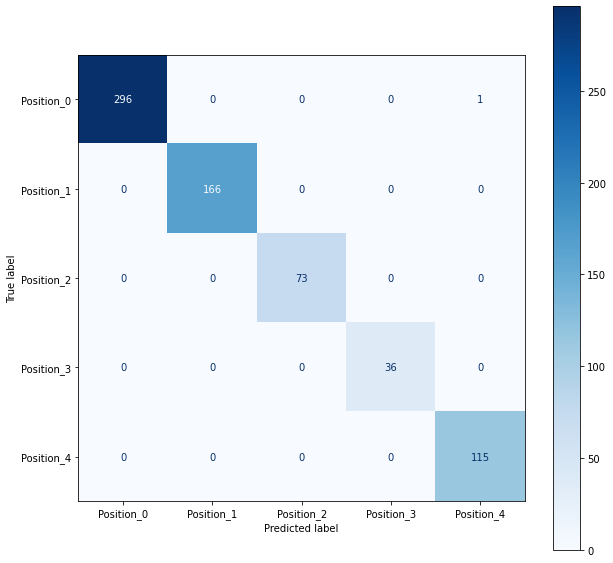

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(grid,X_test,y_test,display_labels=class_name,cmap=plt.cm.Blues, ax=ax)

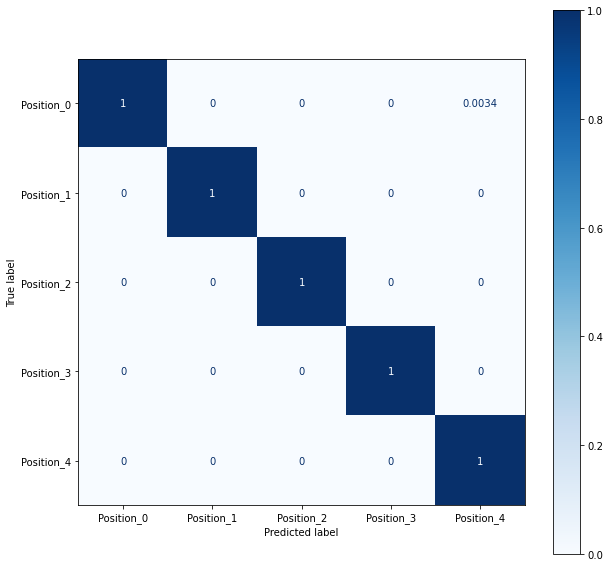

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(grid,X_test,y_test,display_labels=class_name,cmap=plt.cm.Blues, ax=ax, normalize='true')

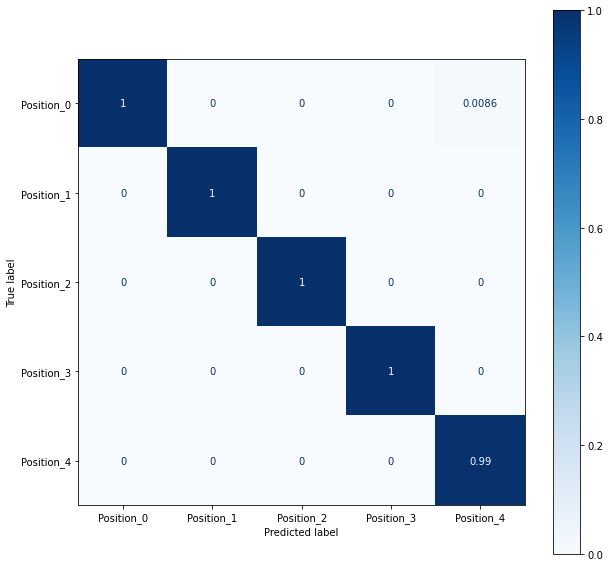

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(grid,X_test,y_test,display_labels=class_name,cmap=plt.cm.Blues, ax=ax, normalize='pred')

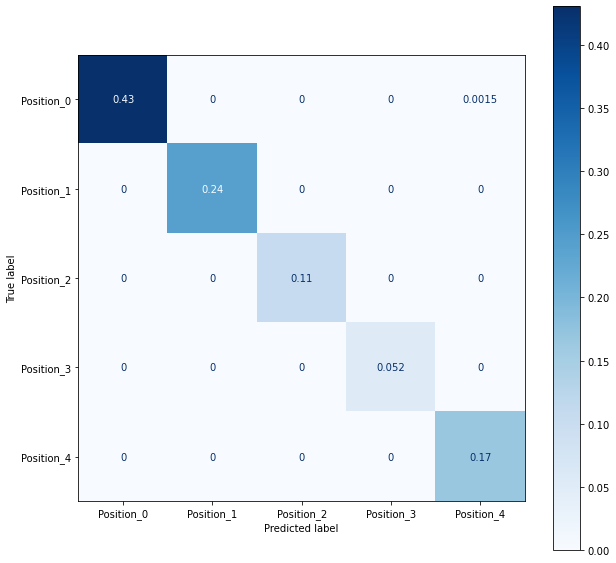

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(grid,X_test,y_test,display_labels=class_name,cmap=plt.cm.Blues, ax=ax, normalize='all')

## save model

In [27]:
filename = 'svm_model.sav'
pickle.dump(grid, open(filename,'wb'))

## load model

In [33]:
load_model = pickle.load(open(filename,'rb'))
result = load_model.score(X_test, y_test)
print(result)

0.9985443959243085


In [34]:
## testing with user defined values

In [50]:
user_defined_values =[[-7,8,18,2,4,6,20,15]]

In [51]:
testing = load_model.predict(user_defined_values)

In [68]:
testing = np.int(testing)

In [55]:
class_name = ["Position_0","Position_1","Position_2","Position_3","Position_4"]

In [70]:
class_name[testing]

'Position_0'

In [87]:
test['Sensor0'].min(),test['Sensor0'].max()

(-118, 112)

In [88]:
test['Sensor1'].min(),test['Sensor1'].max()

(-300, 162)

In [89]:
test['Sensor2'].min(),test['Sensor2'].max()

(-124, 61)

In [90]:
test['Sensor3'].min(),test['Sensor3'].max()

(-80, 52)

In [91]:
test['Sensor4'].min(),test['Sensor4'].max()

(-66, 48)

In [92]:
test['Sensor5'].min(),test['Sensor5'].max()

(-91, 124)

In [93]:
test['Sensor6'].min(),test['Sensor6'].max()

(-85, 90)

In [94]:
test['Sensor7'].min(),test['Sensor7'].max()

(-53, 46)